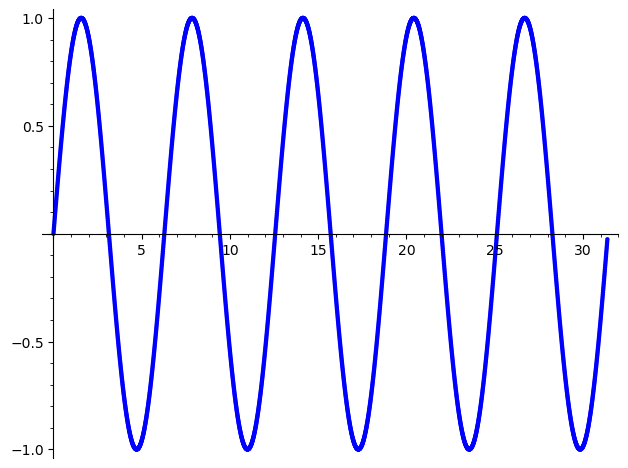

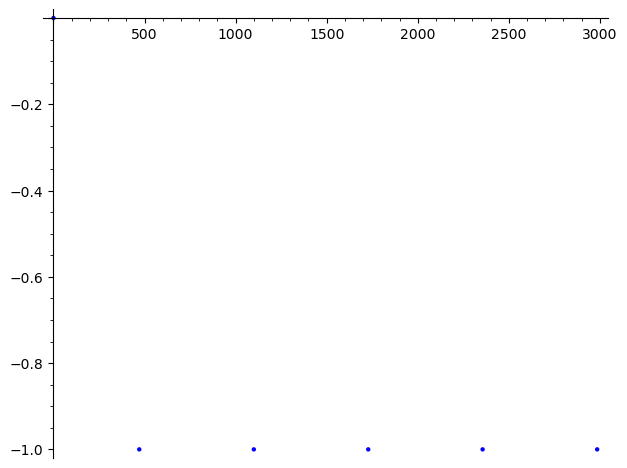

In [1]:
def lower_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0<val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end<val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding>val_k:
            if val_next>val_k:
                envelope.append((k,val_k))
    return envelope
        
        
sine_curve=[[k/100,sin(k/100)] for k in range(0,10*314)]
pls=list_plot(sine_curve)
show(pls)
env=lower_envelope_pairlist(sine_curve)
pls2=list_plot(env)
show(pls2)

PARI stack size set to 6000000000 bytes, maximum size set to 7000002560
PARI stack size set to: 6.00 GB
Memoization setup complete
Functions defined
Computing j_list...
Progress: n=50/400
Progress: n=100/400
Progress: n=150/400
Progress: n=200/400
Progress: n=250/400
Progress: n=300/400
Progress: n=350/400
Progress: n=400/400
j_list computed with 401 elements
j_list saved to /Users/barrybrent/data/run27nov25no1.txt
P_matrix function defined
Setup complete for matrix computations
Computing matrices and roots...
Progress: n=20/400
Progress: n=40/400
Progress: n=60/400
Progress: n=80/400
Progress: n=100/400
Progress: n=120/400
Progress: n=140/400
Progress: n=160/400
Progress: n=180/400
Progress: n=200/400
Progress: n=220/400
Progress: n=240/400
Progress: n=260/400
Progress: n=280/400
Progress: n=300/400
Progress: n=320/400
Progress: n=340/400
Progress: n=360/400
Progress: n=380/400
Progress: n=400/400
Computation complete!
Generating plots...
MINIMUM MODULI


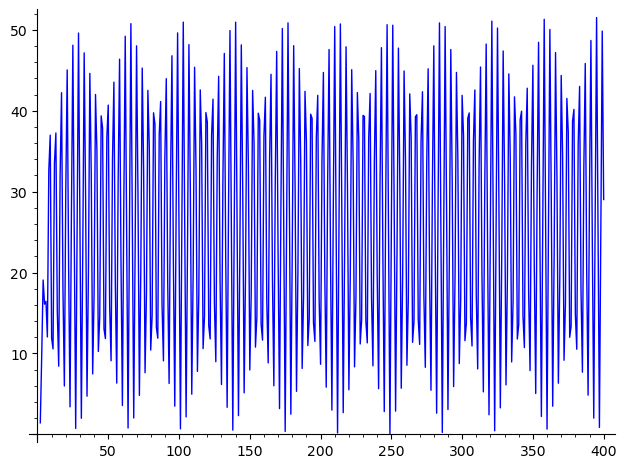

LOGS MINIMUM MODULI


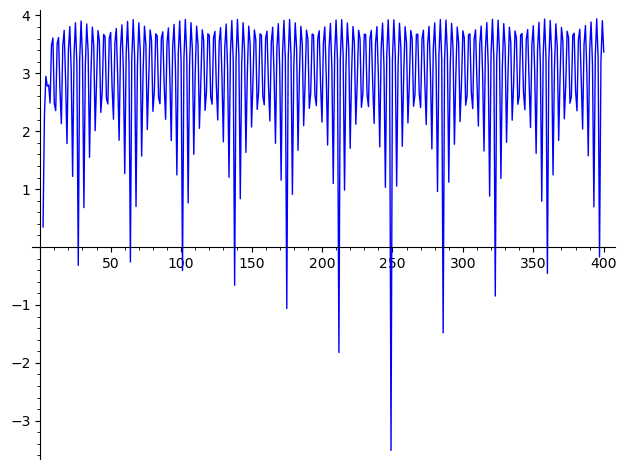

minimum logarithm of minimum modulus: -3.511881470858303500659927168303267069734095837525346202025672314778288642049724579505956953478788792106177028312025171330196637?
MAXIMUM MODULI


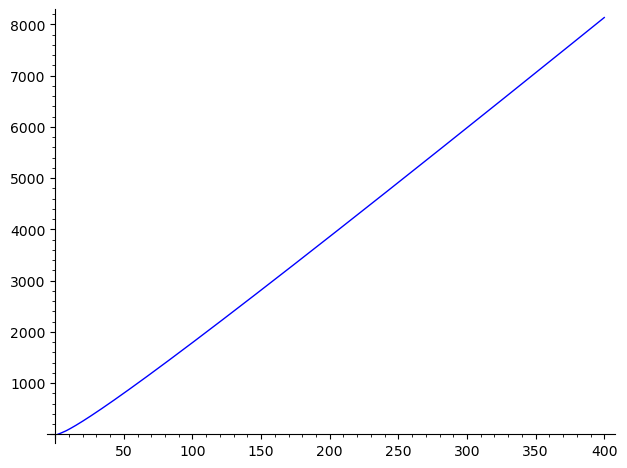

LOGS MAXIMUM MODULI


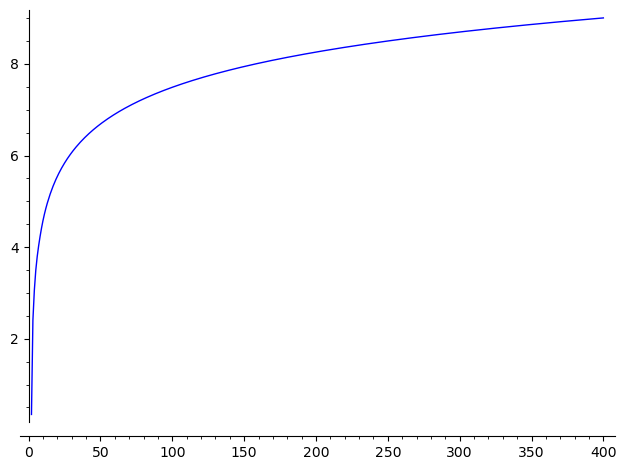

Saving results...
All results saved!
Output files saved to: /Users/barrybrent/data/


In [8]:
import pickle
from sage.all import sigma, nth_prime, matrix, QQ, ComplexIntervalField, polygen, log, list_plot, flatten, pari


pari.allocatemem(6*10**9) 
print(f"PARI stack size set to: {pari.stacksize() / 1e9:.2f} GB")


_sigma_cache = {}
_nth_prime_cache = {}

def sigma_cached(n):
    if n not in _sigma_cache:
        _sigma_cache[n] = sigma(n)
    return _sigma_cache[n]

def nth_prime_cached(n):
    if n not in _nth_prime_cache:
        _nth_prime_cache[n] = nth_prime(n)
    return _nth_prime_cache[n]

print("Memoization setup complete")


def tau(n):
    def step3(n):
        ans = 0
        n_sq = n * n
        
        
        sigma_vals = [sigma_cached(k) for k in range(1, n)]
        sigma_n_minus_k = [sigma_cached(n - k) for k in range(1, n)]
        
        for k in range(1, n):
            
            k_sq = k * k
            step1_val = 35 * k_sq * k_sq - 52 * k_sq * k * n + 18 * k_sq * n_sq
            
            
            step2_val = sigma_vals[k-1] * sigma_n_minus_k[k-1]
            
            ans += step1_val * step2_val
        
        return 24 * ans
    
    return n**4 * sigma_cached(n) - step3(n)

def h(n):
    
    return tau(nth_prime_cached(n))

print("Functions defined")


print("Computing j_list...")
c = 1
j_list = [c, 1]

for n in range(2, 401):
    if n % 50 == 0:
        print(f"Progress: n={n}/400")
    
    
    h_vals = [h(n - r) for r in range(1, n)]
    
   
    partial_sum = sum(j_list[r] * h_vals[r-1] for r in range(1, n))
    
    j_n = n * h(n) - partial_sum
    j_list.append(j_n)

print(f"j_list computed with {len(j_list)} elements")


output_path = '/Users/barrybrent/data/'

with open(output_path + 'run27nov25no8.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile)
    
print(f"j_list saved to {output_path}run27nov25no1.txt")


def P_matrix(lst):
    """Construct P matrix more efficiently"""
    lenlist = len(lst)
    columns = []
    
    
    columns.append(lst)
    
   
    for k in range(1, lenlist):
        column = [0] * (k - 1) + [-k]
        column = flatten(column + [lst])
        column = column[:lenlist]
        columns.append(column)
    
    return matrix(columns).transpose()

print("P_matrix function defined")


precision_bits = 100
CC = ComplexIntervalField(precision_bits)
x = polygen(QQ)

# Pre-allocate lists (NOTE: no matrix_list - saves memory!)
charpol_list = []
roots_list = []
aar_list = []


mins_list = []
log_mins_list = []
maxes_list = []
log_maxes_list = []
dets = []

print("Setup complete for matrix computations")


print("Computing matrices and roots...")
for n in range(2, 401):  # Changed to 401 to match j_list size
    if n % 20 == 0:
        print(f"Progress: n={n}/400")
    
    
    pl = P_matrix(j_list[:n])
    det = pl.det()
    dets.append((n, det))
   
    
    
    cp = pl.charpoly()
    charpol_list.append((n, cp))
    
    
    roots = cp.roots(ring=CC, multiplicities=False)
    roots_list.append((n, roots))
    
    
    
    aar = [r.abs() for r in roots]
    aar_list.append((n, aar))
    
    
    if aar:
        minn = min(aar)
        mins_list.append((n, minn))
        
        if minn > 0:
            log_minn = log(minn)
            log_mins_list.append((n, log_minn))
        
        maxx = max(aar)
        maxes_list.append((n, maxx))
        
        if maxx > 0:
            log_maxx = log(maxx)
            log_maxes_list.append((n, log_maxx))

print("Computation complete!")


print("Generating plots...")

p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()

p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()

mml = [pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:", min(mml))

p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()

p = list_plot(log_maxes_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MAXIMUM MODULI")
p.show()

  
print("Saving results...")

with open(output_path + 'run27nov25no9A.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile)

with open(output_path + 'run27nov25no10A.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile)

with open(output_path + 'run27nov25no11A.txt', 'wb') as wfile:
    pickle.dump(max_diameter_list, wfile)

with open(output_path + 'run27nov25no12A.txt', 'wb') as wfile:
    pickle.dump(dets, wfile)

with open(output_path + 'run27nov25no13A.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile)

with open(output_path + 'run27nov25no14A.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile)

print("All results saved!")
print(f"Output files saved to: {output_path}")


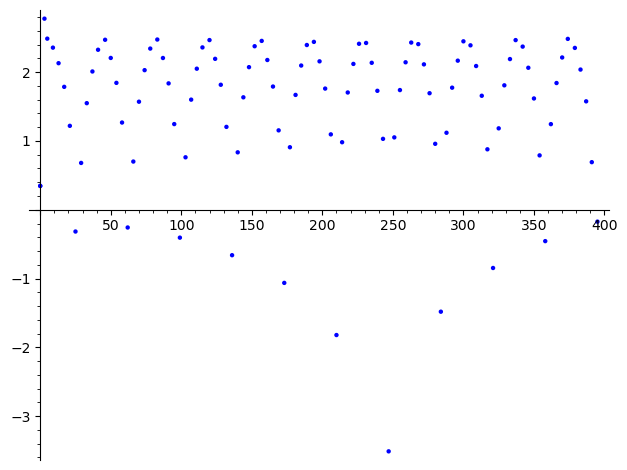

n_list[3:] :
[5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 46, 50, 54, 58, 62, 66, 70, 74, 78, 83, 87, 91, 95, 99, 103, 107, 111, 115, 120, 124, 128, 132, 136, 140, 144, 148, 152, 157, 161, 165, 169, 173, 177, 181, 185, 189, 194, 198, 202, 206, 210, 214, 218, 222, 226, 231, 235, 239, 243, 247, 251, 255, 259, 263, 268, 272, 276, 280, 284, 288, 292, 296, 300, 305, 309, 313, 317, 321, 325, 329, 333, 337, 342, 346, 350, 354, 358, 362, 366, 370, 374, 379, 383, 387, 391, 395]

dt[1:] :
[4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4]

fives:
[10, 19, 28, 37, 46, 55, 64, 73, 82, 91]

nl: [5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 46, 50, 54, 58, 62, 66, 70, 74, 78, 83, 87, 91, 95, 99, 103, 107, 111, 115, 120, 124, 128, 132, 136, 140, 144, 148, 152, 157, 161, 165, 169, 17

In [2]:
def lower_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0<val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end<val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding>val_k:
            if val_next>val_k:
                envelope.append((k,val_k))
    return envelope

def difference_table(lst):
    diffs=[]
    for k in range(0,len(lst)):
        diff=lst[k]-lst[k-1]
        diffs=diffs+[diff]
    return diffs

from sage.all import PolynomialRing, QQ

R = PolynomialRing(QQ, 'x')

def lagrange_poly(points):
    return R.lagrange_polynomial(points)

   
import pickle

with open('/Users/barrybrent/data/run27nov25no13A.txt', 'rb') as rfile:
    log_mins_list = pickle.load(rfile)


env=lower_envelope_pairlist(log_mins_list)
pls=list_plot(env)
show(pls)
n_list=[pair[0] for pair in env]
dt=difference_table(n_list)
n_list=[pair[0] for pair in env]
print("n_list[3:] :")
print(n_list[3:])
print()
dt=difference_table(n_list[3:])
print("dt[1:] :")
print(dt[1:])
print()
fives=[]
for k in range(0,len(dt)-1):
    if dt[k]==5:
        fives.append(k)
print("fives:")
print(fives)
print()
nl=n_list[3:len(n_list)-1]
print("nl:",nl)
print()
dtnl=difference_table(nl)
print("dtnl[1:] :")
print(dtnl[1:])
print()
dtnl_2=difference_table(dtnl[1:])
print("dtnl_2:")
print(dtnl_2)
print()
dtnl_3=difference_table(dtnl_2)
print("dtnl_3:")
print(dtnl_3)
print()
    


Analysis of upper envelope of minimum moduli:


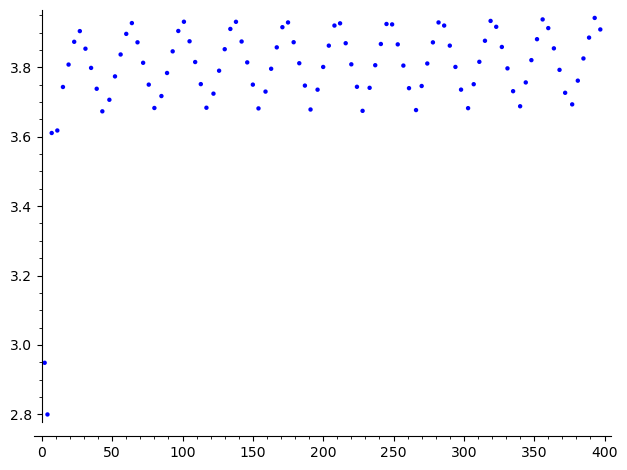

n_list[3:] :
[11, 15, 19, 23, 27, 31, 35, 39, 43, 48, 52, 56, 60, 64, 68, 72, 76, 80, 85, 89, 93, 97, 101, 105, 109, 113, 117, 122, 126, 130, 134, 138, 142, 146, 150, 154, 159, 163, 167, 171, 175, 179, 183, 187, 191, 196, 200, 204, 208, 212, 216, 220, 224, 228, 233, 237, 241, 245, 249, 253, 257, 261, 266, 270, 274, 278, 282, 286, 290, 294, 298, 303, 307, 311, 315, 319, 323, 327, 331, 335, 340, 344, 348, 352, 356, 360, 364, 368, 372, 377, 381, 385, 389, 393, 397]

dt[1:] :
[4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4]

fives:
[9, 18, 27, 36, 45, 54, 62, 71, 80, 89]



In [4]:
with open('/Users/barrybrent/data/run27nov25no13A.txt', 'rb') as rfile:
    log_mins_list = pickle.load(rfile)


def upper_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0>val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end>val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding<val_k:
            if val_next<val_k:
                envelope.append((k,val_k))
    return envelope
print()
print("Analysis of upper envelope of minimum moduli:")

env=upper_envelope_pairlist(log_mins_list)
pls=list_plot(env)
show(pls)
n_list=[pair[0] for pair in env]
dt=difference_table(n_list)
n_list=[pair[0] for pair in env]
print("n_list[3:] :")
print(n_list[3:])
print()
dt=difference_table(n_list[3:])
print("dt[1:] :")
print(dt[1:])
print()
fives=[]
for k in range(0,len(dt)):
    if dt[k]==5:
        fives.append(k)
print("fives:")
print(fives)
print()

In [8]:
n_list3=[5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 46, 50, 54, 
 58, 62, 66, 70, 74, 78, 83, 87, 91, 95, 99, 103,
 107, 111, 115, 120, 124, 128, 132, 136, 140, 144, 
 148, 152, 157, 161, 165, 169, 173, 177, 181, 185,
 189, 194, 198, 202, 206, 210, 214, 218, 222, 226, 
 231, 235, 239, 243, 247, 251, 255, 259, 263, 268, 
 272, 276, 280, 284, 288, 292, 296, 300, 305, 309, 
 313, 317, 321, 325, 329, 333, 337, 342, 346, 350, 354, 
 358, 362, 366, 370, 374, 379, 383, 387, 391, 395]

test=[]
for n in n_list3:
    test.append(n%4)
print(test)
print(len([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(len( [1, 1, 1, 1, 1, 1, 1, 1, 1]))
print(len([2, 2, 2, 2, 2, 2, 2, 2, 2]))
print(
    len(
        [2, 2, 2, 2, 2, 2, 2, 2, 2]
    )
)
print(len([3, 3, 3, 3, 3, 3, 3, 3, 3]))
print(len([3, 3, 3, 3, 3, 3, 3, 3, 3]))
print(len([ 0, 0, 0, 0, 0, 0, 0, 0, 0]))
print(len([0, 0, 0, 0, 0, 0, 0, 0, 0]))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
10
9
9
9
9
9
9
9


In [7]:
n_list3=[11, 15, 19, 23, 27, 31, 35, 39, 43, 48, 52, 56, 60, 64, 68, 72, 76, 80, 85, 89, 93, 97, 101, 105, 
         109, 113, 117, 122, 126, 130, 134, 138, 142, 146, 150, 154, 159, 163, 167, 171, 175, 179, 183, 
         187, 191, 196, 200, 204, 208, 212, 216, 220, 224, 228, 233, 237, 241, 245, 249, 253, 257, 261, 
         266, 270, 274, 278, 282, 286, 290, 294, 298, 303, 307, 311, 315, 319, 323, 327, 331, 335, 340, 
         344, 348, 352, 356, 360, 364, 368, 372, 377, 381, 385, 389, 393, 397]
test=[]
for n in n_list3:
    test.append(n%4)
print(test)
print(len([3, 3, 3, 3, 3, 3, 3, 3, 3]))
print(len([3, 3, 3, 3, 3, 3, 3, 3, 3]))
print(len([3, 3, 3, 3, 3, 3, 3, 3, 3]))
print(len([0, 0, 0, 0, 0, 0, 0, 0, 0]))
print(len([0, 0, 0, 0, 0, 0, 0, 0, 0]))
print(len([0, 0, 0, 0, 0, 0, 0, 0, 0]))
print(len([2, 2, 2, 2, 2, 2, 2, 2, 2]))
print(len([2, 2, 2, 2, 2, 2, 2, 2, 2]))


[3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
9
9
9
9
9
9
9
9
